In [1]:
% pylab inline
import os
import random
import pandas as pd
from scipy.misc import imread
#import imshow

Populating the interactive namespace from numpy and matplotlib


In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

Age:  YOUNG


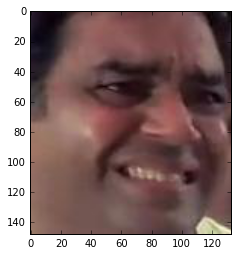

In [3]:
i=random.choice(train.index)
img_name = train.ID[i]
img = imread(os.path.join('Train', img_name))

print "Age: ", train.Class[i]

imshow(img)

In [4]:
from scipy.misc import imresize

temp=[]
for img_name in train.ID:
    img_path=os.path.join('Train',img_name)
    img=imread(img_path)
    img=imresize(img,(32,32))
    img=img.astype('float32')
    temp.append(img)

import numpy as np

train_x=np.stack(temp)

In [5]:
train_x/=255

In [6]:
train.Class.value_counts(normalize=True)

MIDDLE    0.542751
YOUNG     0.336883
OLD       0.120366
Name: Class, dtype: float64

In [7]:
train_labels=train.Class

In [8]:
train_labels=train_labels.reshape(19906,1)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [9]:
from sklearn.preprocessing import LabelEncoder
import keras
lb = LabelEncoder()
train_labels = lb.fit_transform(train.Class)
train_labels = keras.utils.np_utils.to_categorical(train_labels)

Using TensorFlow backend.


In [10]:
from keras.models import Sequential
from keras.layers import *

In [11]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(3,activation='softmax'))

In [13]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
model.fit(train_x,train_labels,batch_size=128,epochs=100,verbose=1,validation_split=0.2)

Train on 15924 samples, validate on 3982 samples
Epoch 1/100
15924/15924 [==============================] - 41s - loss: 0.8997 - acc: 0.5721 - val_loss: 0.8398 - val_acc: 0.6291
Epoch 2/100
15924/15924 [==============================] - 41s - loss: 0.7956 - acc: 0.6414 - val_loss: 0.8262 - val_acc: 0.6404
Epoch 3/100
15924/15924 [==============================] - 41s - loss: 0.7432 - acc: 0.6652 - val_loss: 0.7557 - val_acc: 0.6848
Epoch 4/100
15924/15924 [==============================] - 41s - loss: 0.7158 - acc: 0.6848 - val_loss: 0.7089 - val_acc: 0.7092
Epoch 5/100
15924/15924 [==============================] - 41s - loss: 0.6833 - acc: 0.6988 - val_loss: 0.7133 - val_acc: 0.7032
Epoch 6/100
15924/15924 [==============================] - 41s - loss: 0.6533 - acc: 0.7155 - val_loss: 0.7091 - val_acc: 0.6959
Epoch 7/100
15924/15924 [==============================] - 42s - loss: 0.6417 - acc: 0.7241 - val_loss: 0.7057 - val_acc: 0.7027
Epoch 8/100
15924/15924 [=======================

15924/15924 [==============================] - 42s - loss: 0.1966 - acc: 0.9228 - val_loss: 0.5234 - val_acc: 0.8044
Epoch 64/100
15924/15924 [==============================] - 42s - loss: 0.1934 - acc: 0.9251 - val_loss: 0.5385 - val_acc: 0.7981
Epoch 65/100
15924/15924 [==============================] - 42s - loss: 0.1906 - acc: 0.9280 - val_loss: 0.5212 - val_acc: 0.8044
Epoch 66/100
15924/15924 [==============================] - 42s - loss: 0.1924 - acc: 0.9260 - val_loss: 0.5389 - val_acc: 0.8041
Epoch 67/100
15924/15924 [==============================] - 42s - loss: 0.1824 - acc: 0.9302 - val_loss: 0.5224 - val_acc: 0.8041
Epoch 68/100
15924/15924 [==============================] - 42s - loss: 0.1836 - acc: 0.9274 - val_loss: 0.5126 - val_acc: 0.8084
Epoch 69/100
15924/15924 [==============================] - 42s - loss: 0.1700 - acc: 0.9354 - val_loss: 0.5392 - val_acc: 0.7978
Epoch 70/100
15924/15924 [==============================] - 42s - loss: 0.1761 - acc: 0.9297 - val_loss

In [15]:
model.save_weights('2nd_iter.h5')

In [34]:
from scipy.misc import imresize

ghj=[]
for img_name in test.ID:
    img_path=os.path.join('Test',img_name)
    img=imread(img_path)
    img=imresize(img,(32,32))
    img=img.astype('float32')
    ghj.append(img)

import numpy as np

test_x=np.stack(ghj)

In [35]:
test_x/=255

In [36]:
pred = model.predict_classes(test_x)
print np.unique(pred)
pred = lb.inverse_transform(pred)
print pred[5]

6624/6636 [============================>.] - ETA: 0s[0 1 2]
MIDDLE


In [39]:
test['Class'] = pred
test.to_csv("sub02.csv", index=False)